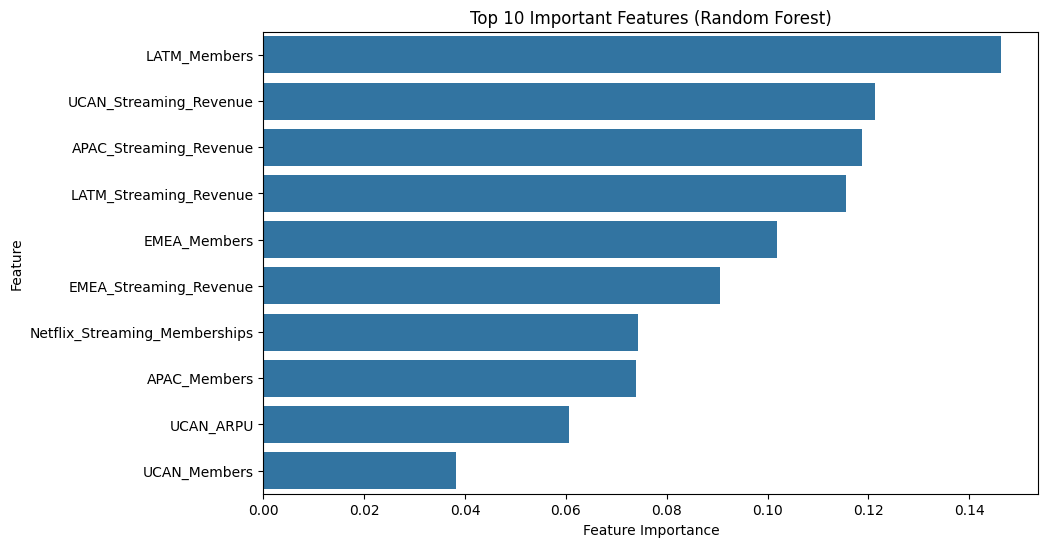

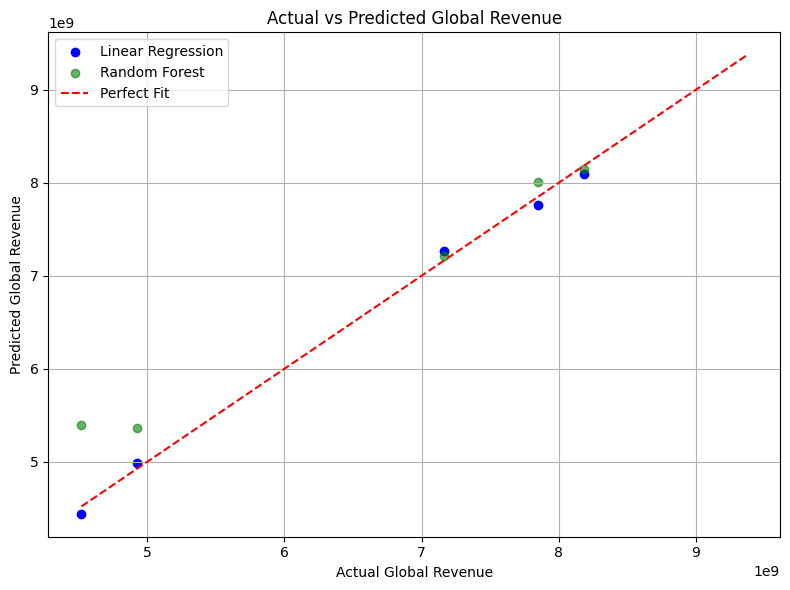

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\Dell\Desktop\Mine\DATASET\Netflix\netflix_revenue_updated.csv")
df.head()

df.columns = df.columns.str.strip().str.replace("  ", " ").str.replace(" ", "_")

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values(by='Date')

target = 'Global_Revenue'
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)]
}

metrics_df = pd.DataFrame(metrics)

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

metrics_df, feature_importances.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Global Revenue')
plt.ylabel('Predicted Global Revenue')
plt.title('Actual vs Predicted Global Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




